In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import opendatasets as od
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv("D:/DataAnalysis/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# performing chi square test on tenure products_number,credit_card,active_member, churn

#making contengancy table
list_cat = ["products_number","credit_card","active_member","tenure"]
for i in list_cat:
    dataCrosstab = pd.crosstab(df[i],df['churn'])
    chi2, p, dof, expected = chi2_contingency(dataCrosstab)
    if(p < 0.05):
        print(i+" and churn are dependent as p ="+ str(p))
    else:
        print(i+" and churn are independent  as p ="+str(p))
# as we can see   products_number and   active_member are dependent on churn so dropping credit_card and tenure

products_number and churn are dependent as p =0.0
credit_card and churn are independent  as p =0.49237236141554686
active_member and churn are dependent as p =8.785858269303703e-55
tenure and churn are independent  as p =0.17758462026413294


In [4]:
df = df.drop(['credit_card','tenure'], axis=1)
df.head()

,customer_id,credit_score,country,gender,age,balance,products_number,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,0.00,1,1,101348.88,1
1,15647311,608,Spain,Female,41,83807.86,1,1,112542.58,0
2,15619304,502,France,Female,42,159660.80,3,0,113931.57,1
3,15701354,699,France,Female,39,0.00,2,0,93826.63,0
4,15737888,850,Spain,Female,43,125510.82,1,1,79084.10,0


In [5]:
#performing anova test num vs cat cols for dependency check
num_cols = ["credit_score","age","balance","estimated_salary"]
for i in num_cols:
  # Performing two-way ANOVA
    model = ols(i+' ~ churn', data = df).fit()
    result = sm.stats.anova_lm(model, typ=2)
    if(result['PR(>F)']['churn'] < 0.05):
        print(i+" and churn are dependent as p ="+ str(result['PR(>F)']['churn']))
    else:
        print(i+" and churn are independent as p ="+ str(result['PR(>F)']['churn']))
# estimated_salary is not dependent on churn hence  dropping it

credit_score and churn are dependent as p =0.006738213892205324
age and churn are dependent as p =1.2399313093459443e-186
balance and churn are dependent as p =1.2755633191546494e-32
estimated_salary and churn are independent as p =0.22644042802263928


In [6]:
df = df.drop(['estimated_salary'], axis=1)
df.head()

,customer_id,credit_score,country,gender,age,balance,products_number,active_member,churn
0,15634602,619,France,Female,42,0.00,1,1,1
1,15647311,608,Spain,Female,41,83807.86,1,1,0
2,15619304,502,France,Female,42,159660.80,3,0,1
3,15701354,699,France,Female,39,0.00,2,0,0
4,15737888,850,Spain,Female,43,125510.82,1,1,0


In [7]:
X = df[['credit_score','age','balance','products_number','active_member']]
y= df['churn']

In [8]:
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y ,  random_state=5,  test_size=0.20, shuffle=False)

In [9]:
modelKnn = KNeighborsClassifier(n_neighbors=24)
modelKnn.fit(X_train,y_train)
accuracy_score(y_test, modelKnn.predict(X_test))

0.806

In [10]:
acc = []
for i in range(5,100):
    modelKnn = KNeighborsClassifier(n_neighbors=i)
    modelKnn.fit(X_train,y_train)
    acc.append(accuracy_score(y_test, modelKnn.predict(X_test)))

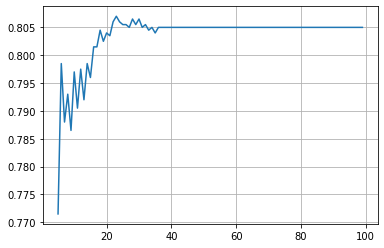

In [11]:
x = [x for x in range(5,100)]
plt.plot(x, acc)  # Plot the chart
plt.grid(True)
plt.show()  # display

C:\Users\abhin\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but KNeighborsClassifier is expecting 5 features as input.

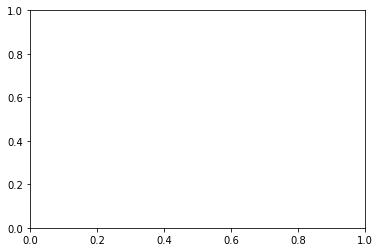

In [14]:
plot_decision_regions(X_train[['credit_score','age']].to_numpy(),y_train.to_numpy(),clf=modelKnn)